<figure>
<IMG SRC="../../lectures/images/PhysicsLogo.jpg" WIDTH=100 ALIGN="right">
</figure>
# [Physics 411](http://jklymak.github.io/Phy411/) Time Series Analysis
*Jody Klymak*


Assignment Submission by:
Laura Grondahl

# Assignment 1

## Q1: Simulate aliasing of sinusoidal signals

For this problem you will simulate the phenomena of aliasing.  This will give you pracitice in making synthetic time series, subsetting data, and plotting your results.

**1** To start, make a time vector that goes from 0 to 120 s, with 10000 entries in it.  Then make a synthetic time series that has two close in frequency sine waves:

$$ x = A_1 \cos (\omega t) + A_2 \cos ((\omega_1+\delta \omega ) t) $$

where $\omega$ is the "carrier" frequency, and $\delta \omega << \omega$ is the difference in frequencies between the two waves.  For simplicty, you could make $A_1=A_2=1. [V]$.  Feel free to choose an interesting $\omega$.

<hr>

In [2]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy.stats as stats
import matplotlib.mlab as mlab

%matplotlib inline

In [3]:
# A time vector from 0 to 120 s with 10000 entries
time = np.linspace(0.,120.,10000)
print "\ntime vector:"
print time

# The carrier frequency, and the difference between frequencies, in rad/s
w = 0.2
dw = 0.01

# The first sine wave
wave1 = np.cos(w*time)

# The second sine wave
wave2 = np.cos((w+dw)*time)

# The synthetic time series as a sum of the two sine waves
x = wave1 + wave2

# Print the waves and the summed time series
print "\nx1:"
print wave1
print "\nx2:"
print wave2
print "\nx=x1+x2:"
print x


time vector:
[  0.00000000e+00   1.20012001e-02   2.40024002e-02 ...,   1.19975998e+02
   1.19987999e+02   1.20000000e+02]

x1:
[ 1.          0.99999712  0.99998848 ...,  0.41982693  0.42200418
  0.42417901]

x2:
[ 1.          0.99999682  0.9999873  ...,  0.99806507  0.99790519
  0.99773898]

x=x1+x2:
[ 2.          1.99999394  1.99997577 ...,  1.41789199  1.41990938
  1.42191799]


**2** Now plot the two component waves and the full value of $x$ as a time series.  Preferably on the same axis.  Make sure to label your axes and include a legend<hr>

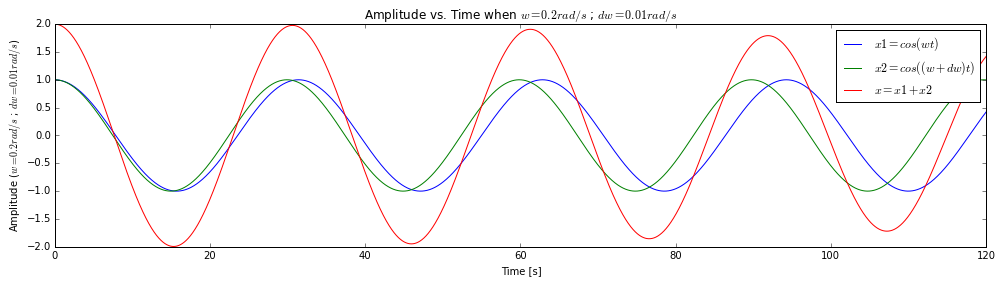

In [4]:
# Create the plot
plt.figure(figsize=(14,4))        # Make figure
gs=gridspec.GridSpec(1,1)        # Set up the layout
ax1=plt.subplot(gs[0:1])         # select the whole grid to plot in
ax1.plot(time,wave1,label='$x1=cos(wt)$')       # plot
ax1.plot(time,wave2,label='$x2=cos((w+dw)t)$')  # plot
ax1.plot(time,x,label='$x=x1+x2$')              # plot
ax1.set_xlabel('Time [s]'),ax1.set_ylabel('Amplitude ($w=0.2rad/s$ ; $dw=0.01rad/s$)'),ax1.legend()   # label
ax1.set_title('Amplitude vs. Time when $w=0.2rad/s$ ; $dw=0.01rad/s$')

# tighten the layout a bit
plt.tight_layout()               

**3** Try a few different values of $\delta\omega$, and compare.<hr>

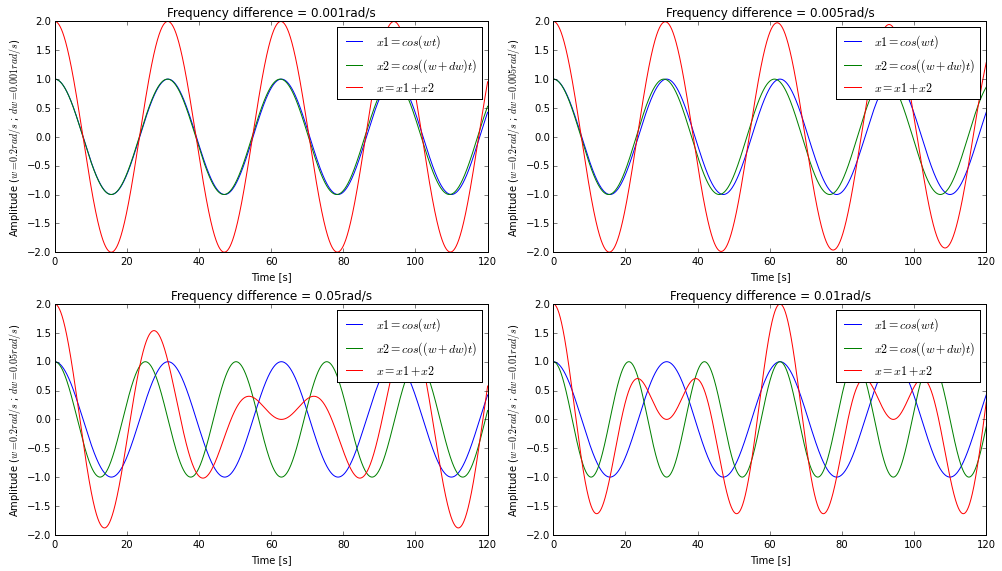

In [5]:
# Set some new frequency differences
dw_a = 0.001
dw_b = 0.005
dw_c = 0.05
dw_d = 0.1

# Set the corresponding sine waves and summed time series
wave2_a = np.cos((w+dw_a)*time)
wave2_b = np.cos((w+dw_b)*time)
wave2_c = np.cos((w+dw_c)*time)
wave2_d = np.cos((w+dw_d)*time)
x_a = wave1 + wave2_a
x_b = wave1 + wave2_b
x_c = wave1 + wave2_c
x_d = wave1 + wave2_d

# Create the new grid
plt.figure(figsize=(14,8))        # Make figure
gs=gridspec.GridSpec(2,2)        # Set up the layout

# Plot frequecy w_a
ax1=plt.subplot(gs[0])         # select the cell to plot in
ax1.plot(time,wave1,label='$x1=cos(wt)$')         # plot
ax1.plot(time,wave2_a,label='$x2=cos((w+dw)t)$')  # plot
ax1.plot(time,x_a,label='$x=x1+x2$')              # plot
ax1.set_xlabel('Time [s]'),ax1.set_ylabel('Amplitude ($w=0.2rad/s$ ; $dw=0.001rad/s$)'),ax1.legend()   # label
ax1.set_title('Frequency difference = 0.001rad/s')

# Plot frequecy w_b
ax2=plt.subplot(gs[1])         # select the cell to plot in
ax2.plot(time,wave1,label='$x1=cos(wt)$')         # plot
ax2.plot(time,wave2_b,label='$x2=cos((w+dw)t)$')  # plot
ax2.plot(time,x_b,label='$x=x1+x2$')              # plot
ax2.set_xlabel('Time [s]'),ax2.set_ylabel('Amplitude ($w=0.2rad/s$ ; $dw=0.005rad/s$)'),ax2.legend()   # label
ax2.set_title('Frequency difference = 0.005rad/s')

# Plot frequecy w_c
ax3=plt.subplot(gs[2])         # select the cell to plot in
ax3.plot(time,wave1,label='$x1=cos(wt)$')         # plot
ax3.plot(time,wave2_c,label='$x2=cos((w+dw)t)$')  # plot
ax3.plot(time,x_c,label='$x=x1+x2$')              # plot
ax3.set_xlabel('Time [s]'),ax3.set_ylabel('Amplitude ($w=0.2rad/s$ ; $dw=0.05rad/s$)'),ax3.legend()   # label
ax3.set_title('Frequency difference = 0.05rad/s')

# Plot frequecy w_d
ax4=plt.subplot(gs[3])         # select the cell to plot in
ax4.plot(time,wave1,label='$x1=cos(wt)$')         # plot
ax4.plot(time,wave2_d,label='$x2=cos((w+dw)t)$')  # plot
ax4.plot(time,x_d,label='$x=x1+x2$')              # plot
ax4.set_xlabel('Time [s]'),ax4.set_ylabel('Amplitude ($w=0.2rad/s$ ; $dw=0.01rad/s$)'),ax4.legend()   # label
ax4.set_title('Frequency difference = 0.01rad/s')

# tighten the layout a bit
plt.tight_layout()   


**4** Now, just so this works, let me specify some numbers for you.  Make $\omega=\frac{2\pi}{3}$, and $\delta\omega=\omega/10.$.  Plot the original time series, and a subsampled time series that just consists of every 200th point.  In a "Markdown" box below the code (or as a comment) describe the difference in these two signals as quantifiably as you can.  <hr>

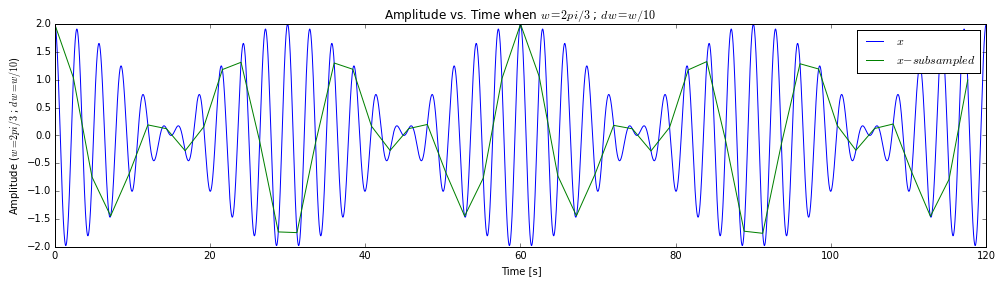

In [6]:
# Set the specified w and dw
w = 2./3.*np.pi
dw = w/10

# Reset the waves
wave1 = np.cos(w*time)
wave2 = np.cos((w+dw)*time)
x = wave1 + wave2

# Create the subsampled time series
time_sub = time[0::200]
x_sub = x[0::200]

# Plot the graphs
plt.figure(figsize=(14,4))       # Make figure
gs=gridspec.GridSpec(1,1)        # Set up the layout
ax1=plt.subplot(gs[0:1])         # select the whole grid to plot in
ax1.plot(time,x,label='$x$')                            # plot
ax1.plot(time_sub,x_sub,label='$x-subsampled$')         # plot
ax1.set_xlabel('Time [s]'),ax1.set_ylabel('Amplitude ($w=2pi/3$ ; $dw=w/10$)'),ax1.legend()   # label
ax1.set_title('Amplitude vs. Time when $w=2pi/3$ ; $dw = w/10$')

# tighten the layout a bit
plt.tight_layout()

In the graph above, it is clear that x and x-subsampled look different. x resembles a wave packet with a clearly visible enveloping wave function, while the x-subsampled graph loses the enveloping function, and instead resembles a single wave with periodic dampening (there are smaller maxima and minima in between the absolute maxima and minima of the wave).

## Q2: Demonstrate the central limit theorem for a very unfair coin flip.

Consider a coin that is twice as likely to come up heads as tails. To put a number on it, call tails $x=-1/2$ and heads $x=+1/2$.  

**1** What are the mean, $\mu_x$, and variance $\sigma_x^2$ of this process?

<hr>

μx = -1/2 * p(-1/2) + 1/2 * p(1/2)
   = -1/2 * 1/3 + 1/2 * 2/3
-> mean = 1/6

σx2 = p(-1/2) * (-1/2 - 1/6)^2 + p(1/2) * (1/2 - 1/6)^2
    = 1/3 * (-4/6)^2 + 2/3 * (2/6)^2
-> variance = 2/9

In [7]:
mean = -1./2. * 1./3. + 1./2. * 2./3.
print "\nmean=",mean
var = 1./3. * (-4./6.)**2 + 2./3. * (2./6.)**2
print "\nvariance=",var


mean= 0.166666666667

variance= 0.222222222222


**2** Plot or represent the *probability distribution*  (or cumulative distrubution) of this process.
<hr>

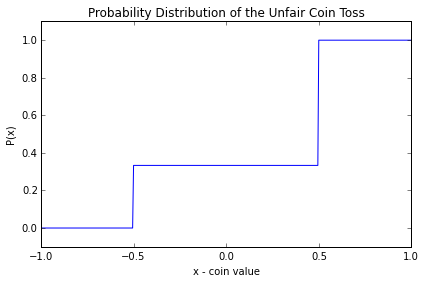

In [8]:
# range() for floats, function credit to kichik on stackoverflow.com, Sept 1, 2011
def frange(x, y, jump):
  while x < y:
    yield x
    x += jump

# set x value and probability vectors
x = np.arange(-1.,1.,0.005)
P = x*0.

# add tails probability
for i in frange(-0.5,1.,1.5):
    P[x>i]=P[x>i] + 1./3.

# add heads probability
for i in frange(0.5,1.,0.5):
    P[x>i]=P[x>i] + 2./3.
    
# Plot the PDF
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(x,P)
ax.set_xlabel('x - coin value');ax.set_ylabel('P(x)');ax.set_ylim([-0.1,1.1])
ax.set_title('Probability Distribution of the Unfair Coin Toss')

# tighten the layout a bit
fig.tight_layout()

**3** Write a function using the `np.random.rand` function to simulate the coin flip.  It shoudl return $+1/2+$ twice as often as $-1/2$.  Demonstrate that your function works.
<hr>

Mean:  0.176
Standard Deviation:  0.468
Tosses:  [ 0.5  0.5  0.5 ...,  0.5 -0.5  0.5]


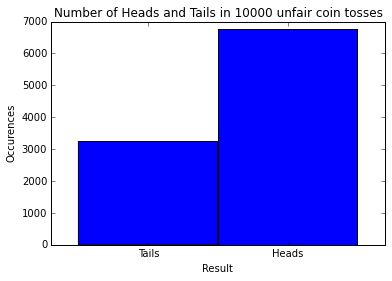

In [9]:
# Unfair coin toss simulator function where +1/2 is heads and -1/2 is tails
def cointoss():
    x = np.random.rand()
    
    # Got Heads
    if(x<2./3.):
        return 0.5
    # Got Tails
    else:
        return -0.5
    
# Demonstrate that cointoss() works by running it 10000 times and show +1/2 occurs about twice as often as -1/2
N = 10000
tosses = np.zeros(N)
for i in range(N):
    tosses[i] = cointoss()
    
# Graph the results
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.hist(tosses,2)
ax.set_xlabel('Result')
ax.set_ylabel('Occurences')
ax.set_title('Number of Heads and Tails in 10000 unfair coin tosses')
plt.xticks([-0.25,0.25],["Tails","Heads"])

# Print the stats
print "Mean: ", np.mean(tosses)
print "Standard Deviation: ", np.std(tosses)
print "Tosses: ", tosses

**4** Perform $N_{flip}$ and take the sample mean $\overline{x}$ of the values.  Do this 2000 times, and show that as $N_{flip}\to\infty$ the distribution of $\overline{x}$ approaches a Normal distribution by plotting the histograms of the means for each.  For $N_{flip}$ choose 2, 16, 64, 256. 

Comment on how the convergence of $\overline{x}$ for the unfair coin compares to the convergence of the sample mean of the dice roll from the notes.  
<hr>

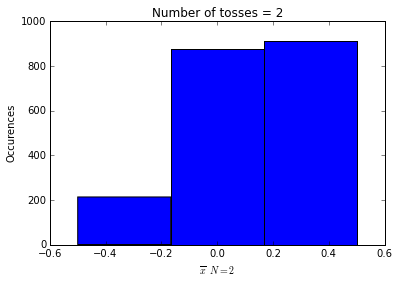

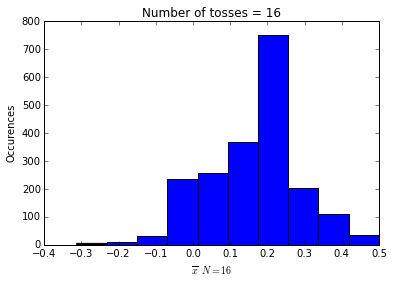

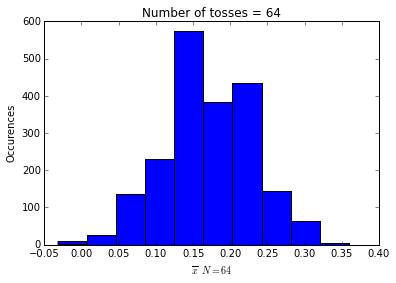

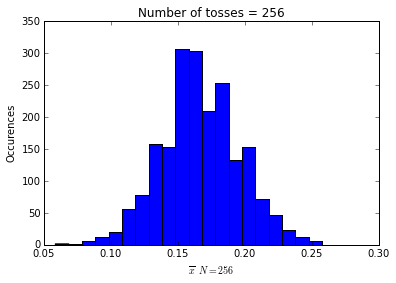

In [10]:
# function to run coinflip N times
def runTosses(N):
    flips = np.zeros(N)
    for i in range(N):
        flips[i] = cointoss()
    return flips 

# function to get means for Nflip number of flips
def getMeans(Nflip,experiments):
    means = np.zeros(experiments) # vector to store mean from each experiment
    for i in range(experiments):
        xx = runTosses(Nflip)
        means[i] = np.mean(xx)
    return means

# function to plot a histogram
def plotHist(means,Nflip,bins):
    fig=plt.figure();ax=fig.add_subplot(1,1,1); 
    ax.hist(means,bins)
    ax.set_xlabel('$\overline{x}\ \ N=%1d$' % Nflip);ax.set_ylabel('Occurences');
    ax.set_title('Number of tosses = %1d' % Nflip)
    
# Collect means for each value of Nflip
Nexpts = 2000 # experiments
means2 = getMeans(2,Nexpts)
means16 = getMeans(16,Nexpts)
means64 = getMeans(64,Nexpts)
means256 = getMeans(256,Nexpts)

# Plot the histograms
plotHist(means2,2,3)
plotHist(means16,16,10)
plotHist(means64,64,10)
plotHist(means256,256,20)

The sample mean of the unfair coin toss seems to converge faster than that of the dice roll. We can see that the coin toss has a very small range of values already when N = 256, whereas the values are still in a wide range for the dice roll when N = 200. This may be because of the number of possibilities. When there are only two options (as with the coin toss) the mean might converge faster.

<hr>
**5** Replot the histograms, removing the mean and normalizing by the standard deviation.  Also show the PDF for normal distribution with mean zero and standard deviation of 1.
<hr>

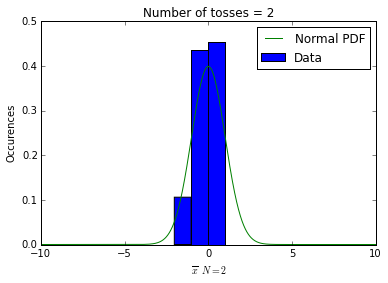

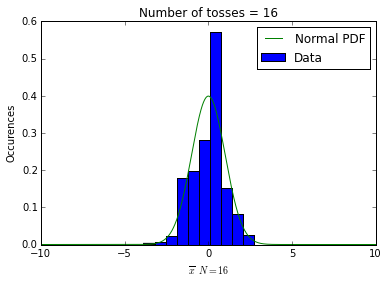

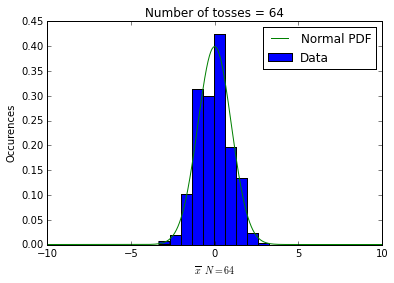

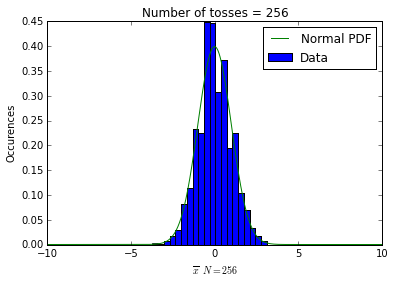

In [16]:
# function to plot a new histogram with the mean removed and normalized by the SD
# also overlay the noromal PDF
def plotNewHist(means,Nflip,bins):
    mean = np.mean(means)
    std = np.std(means)
    
    fig=plt.figure();ax=fig.add_subplot(1,1,1); 
    ax.hist((means-mean)/std,bins,normed=True,label='Data')
    
    # plot the pdf
    x = np.arange(-10.,10.,0.01)
    pdf = mlab.normpdf(x, 0, 1.)
    ax.plot(x,pdf,label='Normal PDF')
    
    ax.set_xlabel('$\overline{x}\ \ N=%1d$' % Nflip);ax.set_ylabel('Occurences');
    ax.set_title('Number of tosses = %1d' % Nflip)
    ax.legend()
    
# Replot the histograms, where meansN are arrays created in the previous question for the original histograms
plotNewHist(means2,2,3)
plotNewHist(means16,16,10)
plotNewHist(means64,64,10)
plotNewHist(means256,256,20)

## Q3: Look at the Deep Cove weather data: 

There are two data sets, one with a sample every minute at 

`http://web.uvic.ca/~jklymak/Phy411/Data/MinuteData/DeepCoveNew.txt`.

Download it locally, or use `genfromtxt` with the url as an argument.

The second is hourly data of the same station and a lot more.

`http://web.uvic.ca/~jklymak/Phy411/Data/AllHourly.txt`


In [12]:
minutedata=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/MinuteData/DeepCoveNew.txt')[:,1]
hourdata=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/AllHourly.txt')[6,2:]


**1** Compare the normalized histograms of the two time series.  Also calculate the means and the standard deviations.
<hr>


Minute Data Mean:  10.3016961717

Hour Data Mean:  10.3387280591

Minute Data Standard Dev:  5.98530478686

Hour Data Standard Dev:  6.06772257867


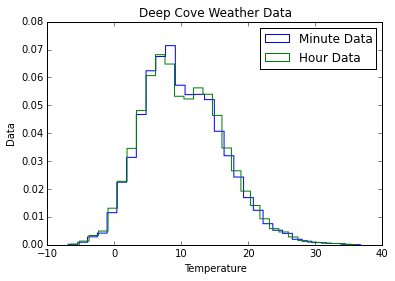

In [13]:
# Create plot
fig,ax=plt.subplots(1,1)
bins = 30

# Create histograms from the given data
ax.hist(minutedata[~np.isnan(minutedata)],bins,label='Minute Data',histtype='step',normed=True)
ax.hist(hourdata[~np.isnan(hourdata)],bins,label='Hour Data',histtype='step',normed=True)

# Make the plot readable
ax.set_xlabel('Temperature');ax.set_ylabel('Data')
ax.set_title('Deep Cove Weather Data')
ax.legend()

# Print the results
print '\nMinute Data Mean: ', np.mean(minutedata[~np.isnan(minutedata)])
print '\nHour Data Mean: ', np.mean(hourdata[~np.isnan(hourdata)])
print '\nMinute Data Standard Dev: ', np.std(minutedata[~np.isnan(minutedata)])
print '\nHour Data Standard Dev: ', np.std(hourdata[~np.isnan(hourdata)])

**2** Comment on the shape of these histograms.  Are they Normal?  Speculate as to why they have this shape.
<hr>

These histograms are not normal, as the data is not symetric about the mean. There is a 'cliff' right around the mean value in each histogram, where the bucketsizes drop off, indicating that temperatures close to but less than the mean are more common than those close to by greater than the mean. Perhaps this has something to do with percipitation, and when the temperature reaches a certain point it tends more towards cooling off than heating up.

<hr>
**3** Redo the histogram and the statistics with just the temperature at 3 PM (both time series start at midnight local time).
<hr>


Minute Data at 3PM Mean:  13.1277794034

Hour Data at 3PM Mean:  13.2200563554

Minute Data Standard Dev:  6.57159473341

Hour Data Standard Dev:  6.72423407189


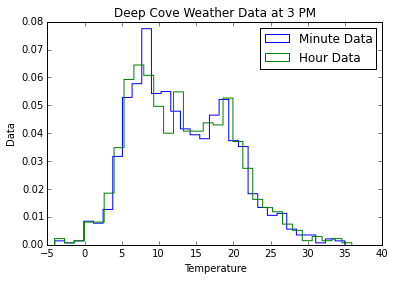

In [14]:
# In the hourly dataset, 3PM is found at every (15 + N*24) entry
hour3 = hourdata[15::24]

# In the minute dataset, 3PM is found at every (15*60 + N*1440) entry 
minute3 = minutedata[900::1440]

# Create plot
fig,ax=plt.subplots(1,1)
bins = 30

# Create histograms from the given data
ax.hist(minute3[~np.isnan(minute3)],bins,label='Minute Data',histtype='step',normed=True)
ax.hist(hour3[~np.isnan(hour3)],bins,label='Hour Data',histtype='step',normed=True)

# Make the plot readable
ax.set_xlabel('Temperature');ax.set_ylabel('Data')
ax.set_title('Deep Cove Weather Data at 3 PM')
ax.legend()

# Print the results
print '\nMinute Data at 3PM Mean: ', np.mean(minute3[~np.isnan(minute3)])
print '\nHour Data at 3PM Mean: ', np.mean(hour3[~np.isnan(hour3)])
print '\nMinute Data Standard Dev: ', np.std(minute3[~np.isnan(minute3)])
print '\nHour Data Standard Dev: ', np.std(hour3[~np.isnan(hour3)])

**4** Redo the histogram and the statistics with just the temperature at 5 AM (both time series start at midnight local time).


Minute Data at 3PM Mean:  8.00691969785

Hour Data at 3PM Mean:  7.94269411541

Minute Data Standard Dev:  4.52813043505

Hour Data Standard Dev:  4.63240283974


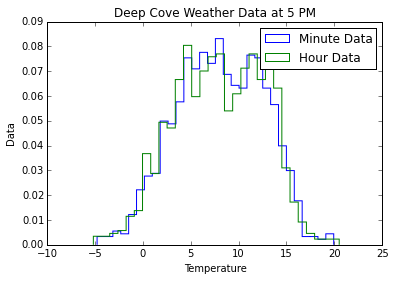

In [15]:
# In the hourly dataset, 5 AM is found at every (5 + N*24) entry
hour3 = hourdata[5::24]

# In the minute dataset, 3PM is found at every (5*60 + N*1440) entry 
minute3 = minutedata[300::1440]

# Create plot
fig,ax=plt.subplots(1,1)
bins = 30

# Create histograms from the given data
ax.hist(minute3[~np.isnan(minute3)],bins,label='Minute Data',histtype='step',normed=True)
ax.hist(hour3[~np.isnan(hour3)],bins,label='Hour Data',histtype='step',normed=True)

# Make the plot readable
ax.set_xlabel('Temperature');ax.set_ylabel('Data')
ax.set_title('Deep Cove Weather Data at 5 PM')
ax.legend()

# Print the results
print '\nMinute Data at 3PM Mean: ', np.mean(minute3[~np.isnan(minute3)])
print '\nHour Data at 3PM Mean: ', np.mean(hour3[~np.isnan(hour3)])
print '\nMinute Data Standard Dev: ', np.std(minute3[~np.isnan(minute3)])
print '\nHour Data Standard Dev: ', np.std(hour3[~np.isnan(hour3)])